#### Simple linear regression is a part of statistics called bivariate statistics which means 2 variables 
Linear regression is a crsoss between correlationa and anova

From the last problem in simple linear regression we only considered the tip ammount in this we would consider both bill data and tip data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Tip and meal data are as follows
Meal_data = {'Meal':[34,108,64,88,99,51],'Tip':[5,17,11,8,14,5]}
#Converting into a data frame
Meal_df = pd.DataFrame(Meal_data, columns = ['Meal','Tip'])

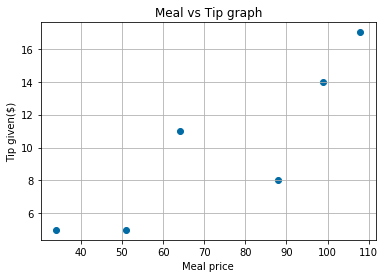

In [3]:
# The scatter plot for meal vs tip price is as follows:
plt.style.use('tableau-colorblind10')
plt.scatter(Meal_df.Meal,Meal_df.Tip)
plt.title('Meal vs Tip graph')
plt.xlabel('Meal price')
plt.ylabel('Tip given($)')
plt.grid(True)

##### Now we want to know to waht degree the tip amount can be predicted by the bill amount. so the tip is the DEPENDENT variable and the bill is the INDEPENDENT variable.

*The goal is to minimize the sum of the squared differences between the observed value for the dependent variable (yi) and the estimated/ predicted value of the dependent variable (yCAPi) that is provided by the regression line. Sum of the squared residuals. The sum of squared residuals should be much smaller than when we just used the dependent variable alone; b1 = 0 , yCAP = 10 for all values of x . That sum of squared residuals was 120*

#### We would now find the correlation coefficient of the above data

In [4]:
r = np.corrcoef(Meal_df.Meal,Meal_df.Tip)

In [5]:
#check the value of r
print(r)

[[1.       0.865665]
 [0.865665 1.      ]]


In [6]:
# We would now find the centroid meal data and consider that at x
x = np.mean(Meal_df.Meal)

In [7]:
#Similarly for tip data we would consider the mean as y
y = np.mean(Meal_df.Tip)

In [8]:
#The values of x, y are as follows
print(x,y)

74.0 10.0


#### The above two values of x and y are coordinates for the centroid , because the line of best fit passes through it

In [9]:
#let us look at our data again.
print(Meal_df)

   Meal  Tip
0    34    5
1   108   17
2    64   11
3    88    8
4    99   14
5    51    5


In [10]:
Meal_df.rename(columns={"Meal":"Bill"})

,Bill,Tip
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


In [11]:
print(Meal_df)

   Meal  Tip
0    34    5
1   108   17
2    64   11
3    88    8
4    99   14
5    51    5


In [12]:
# adding bill deviationa dn tip deviation by subtracting the mean of bill and tip with each variable
Bill_dev = np.mean(Meal_df.Meal)-Meal_df.Meal
Tip_dev = np.mean(Meal_df.Tip)-Meal_df.Tip
Meal_df['Bill_deviation']= Bill_dev
Meal_df['Tip_deviation']= Tip_dev
print(Meal_df)

   Meal  Tip  Bill_deviation  Tip_deviation
0    34    5            40.0            5.0
1   108   17           -34.0           -7.0
2    64   11            10.0           -1.0
3    88    8           -14.0            2.0
4    99   14           -25.0           -4.0
5    51    5            23.0            5.0


In [14]:
# we would now add the product of deviation and the square of the product of the deviation
Bill_dev_2 = Meal_df.Bill_deviation **2
Meal_df['Bill_deviation^2']= Bill_dev_2
print(Meal_df)

   Meal  Tip  Bill_deviation  Tip_deviation  Bill_deviation^2
0    34    5            40.0            5.0            1600.0
1   108   17           -34.0           -7.0            1156.0
2    64   11            10.0           -1.0             100.0
3    88    8           -14.0            2.0             196.0
4    99   14           -25.0           -4.0             625.0
5    51    5            23.0            5.0             529.0


#### We would now caluculate the slope of the regression line
b1 = (sum(xi-xbar) * sum(yi-ybar))/sum(xi-xbar)**2)

Here Bill_deviation would be (xi-xbar) and Tip_deviation would be (yi-ybar) 

In [21]:
# Hence sigma bill deviation and tip deviation would be
Dev_prod = np.sum(Meal_df.Tip * Meal_df.Bill_deviation)*-1
print(Dev_prod)

615.0


In [24]:
# Sum of bill deviation
Sigma_Bill_dev_2=np.sum(Bill_dev_2)
Sigma_Bill_dev_2

4206.0

In [25]:
# Calculating the value of b1 and printing it
b1 = Dev_prod/Sigma_Bill_dev_2
b1

0.14621968616262482

Compairing the value of $b_{1}$ with the equation $b_{0} = \bar{y} - b_{1}\bar{x}$ we get
$b_{1} = 0.14621968616262482$

#### Therefore 
$b_{0} = 10 - 0.1462(74)$


In [31]:
# Which would be calculated as
b0 = np.mean(Meal_df.Tip)-(b1*np.mean(Meal_df.Meal))
b0

-0.8202567760342365

There for in the equation $ \hat{y}_{i} = b_{0} + b_{1}x_{i} $
We have
$ b_{0} = -0.82025 $
$ b_{1} = 0.146219 $

Which means
$ \hat{y}_{i} = -0.82025 + 0.146219x $
or
$ \hat{y}_{i} =  0.146219x - 0.82025 $

We would now plot y = 0.1462x - 0.8203 with each value of y for x

In [49]:
for i in range(0,3):
    print(b1*i - b0)

0.8202567760342365
0.9664764621968613
1.1126961483594862


In [ ]:
# Search on how to store a for loop result into a dataframe